In [2]:
''' 
------------------------------------------------------------------------------------- 
Project Name :  EMAIL SPAM PREDICTION
Team Members :  1. MURALITHARAN R
                2. VAISHNAVI D 
                3. DHINESH S 
                4. DHARSHIYA S 
                5. MOUNIKA M 
File Name    :  EmailSpamPrediction.ipynb
Program      :  Supervised Learning 
------------------------------------------------------------------------------------- 
'''

' \n------------------------------------------------------------------------------------- \nProject Name : EMAIL SPAM PRADICTION\nTeam Members : 1. MURALITHARAN R 2. VAISHNAVI D 3. DHINESH S 4. DHARSHIYA S 5. MOUNIKA M \nFile Name    : EmailSpamPrediction.ipynb\nProgram      : Supervised Learning \n------------------------------------------------------------------------------------- \n'

In [1]:
# Importing necessary libraries
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization

In [2]:
# Reading file
df = pd.read_csv('mail_data.csv', encoding='latin1')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5575 non-null   object
 1   Message   5575 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Transform ham and spam in category column has 0 & 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])

In [6]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Checking missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
# Check duplicate values
df.duplicated().sum()

415

In [9]:
# Remove duplicate
df = df.drop_duplicates(keep = 'first')

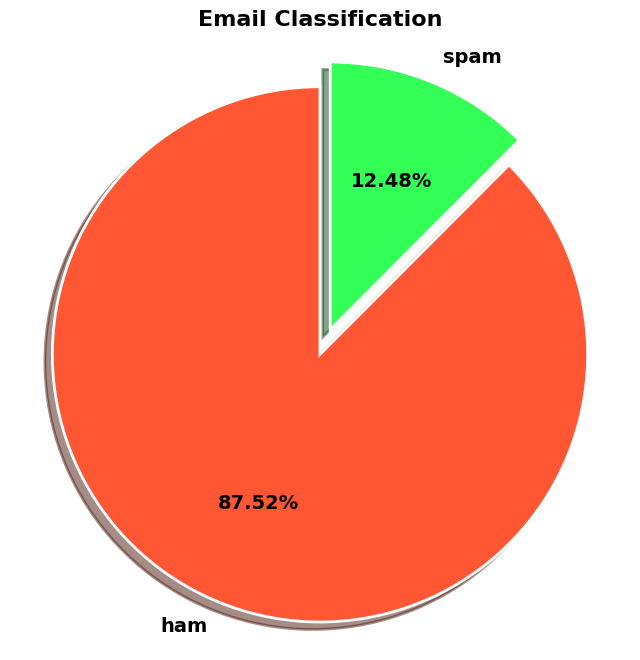

In [10]:
# Define custom colors
colors = ['#FF5733', '#33FF57']
values = df['Category'].value_counts()

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

In [11]:
# Transform Message into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X = tfid.fit_transform(df['Message'])
y = df['Category']

In [12]:
# Split the data for train an test
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 3)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)



clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb  
}

In [14]:
#Find accuracy for Multiple models 
from sklearn.metrics import accuracy_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy 

for name , clfs in clfs.items():
    current_accuracy = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)


For:  SVC
Accuracy:  0.9748062015503876

For:  KNN
Accuracy:  0.9098837209302325

For:  NB
Accuracy:  0.9699612403100775

For:  DT
Accuracy:  0.935077519379845

For:  LR
Accuracy:  0.9525193798449613

For:  RF
Accuracy:  0.9767441860465116


c:\Users\Muralitharan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



For:  Adaboost
Accuracy:  0.9660852713178295

For:  Bgc
Accuracy:  0.9622093023255814

For:  ETC
Accuracy:  0.9777131782945736

For:  GBDT
Accuracy:  0.9496124031007752

For:  xgb
Accuracy:  0.9728682170542635


In [15]:
# Compare Highest accuracy model and Lowest accuracy model
model1 = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
model2 = KNeighborsClassifier()

In [16]:
# Training the ExtraTreesClassifier model with the training data
model1.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [17]:
# Training the KNN model with the training data
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# ExtraTreeClassifier prediction on training data for 
prediction_on_training_data_model1 = model1.predict(X_train)
accuracy_on_training_data_model1 = accuracy_score(y_train, prediction_on_training_data_model1)

In [19]:
# KNN prediction on training data
prediction_on_training_data_model2 = model2.predict(X_train)
accuracy_on_training_data_model2 = accuracy_score(y_train, prediction_on_training_data_model2)

In [20]:
print('ExtraTreeClassifier accuracy on training data : ', accuracy_on_training_data_model1)
print('KNN accuracy on training data : ', accuracy_on_training_data_model2)

ExtraTreeClassifier accuracy on training data :  1.0
KNN accuracy on training data :  0.9106104651162791


In [21]:
# ExtraTreesClassifier prediction on test data
prediction_on_test_data_model1 = model1.predict(X_test)
accuracy_on_test_data_model1 = accuracy_score(y_test, prediction_on_test_data_model1)

In [22]:
# KNN prediction on test data
prediction_on_test_data_model2 = model2.predict(X_test)
accuracy_on_test_data_model2 = accuracy_score(y_test, prediction_on_test_data_model2)

In [23]:
print('ExtraTreeClassifier accuracy on test data : ', accuracy_on_test_data_model1)
print('KNN accuracy on test data : ', accuracy_on_test_data_model2)

ExtraTreeClassifier accuracy on test data :  0.9777131782945736
KNN accuracy on test data :  0.9098837209302325


In [24]:
input_mail = ["To confirm unsubscribe ,please click the link below"]

# convert text to feature vectors
input_data_features = tfid.transform(input_mail)

# making prediction
prediction_model1 = model1.predict(input_data_features)

prediction_model2 = model2.predict(input_data_features)

print("Prediction for ExtraTreesClassifier model:",end="  ")
if (prediction_model1[0]==0):
  print('Ham mail')

else:
  print('Spam mail')
print("Prediction for KNN model:",end="  ")
if (prediction_model2[0]==0):
  print('Ham mail')

else:
  print('Spam mail') 

Prediction for ExtraTreesClassifier model:  Spam mail
Prediction for KNN model:  Ham mail
